In [3]:
import os
import sys
import numpy as np
import json

sys.path.append(os.path.abspath('src')) 


from app import retrieve_text, retrieve_images
from app import text_embeddings_model, text_vectorstore, clip_model, clip_processor, media_index, media_urls, articles_data



ModuleNotFoundError: No module named 'app'

In [ ]:
eval_queries = [
    {
        "query": "How did a Skyfire AI drone help save a police officer's life during a traffic stop?",
        "relevant_articles_urls": ["https://www.deeplearning.ai/the-batch/issue-289/"],
        "relevant_image_urls": ["https://dl-staging-website.ghost.io/content/images/2025/02/unnamed--52-.png"]
    },
    {
        "query": "What is the primary benefit of using an STT → LLM/Agentic workflow → TTS pipeline for voice applications, as opposed to direct voice-in voice-out models?",
        "relevant_articles_urls": ["https://www.deeplearning.ai/the-batch/issue-290/"],
        "relevant_image_urls": ["https://dl-staging-website.ghost.io/content/images/2025/02/unnamed--52-.jpg"]
    },
    {
        "query": "What should teams consider before deciding to fine-tune a model?",
        "relevant_articles_urls": ["https://www.deeplearning.ai/the-batch/issue-294/"],
        "relevant_image_urls": ["https://dl-staging-website.ghost.io/content/images/2025/03/unnamed--56-.jpg"]
    }
]

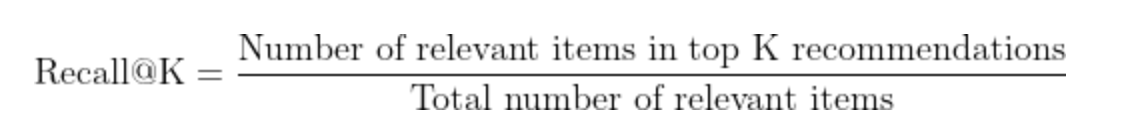

In [ ]:
def recall(retrieved_items, relevant_items):
    if not relevant_items:
        return 1.0 if not retrieved_items else 0.0
    intersection = len(retrieved_items.intersection(relevant_items))
    return intersection / len(relevant_items)

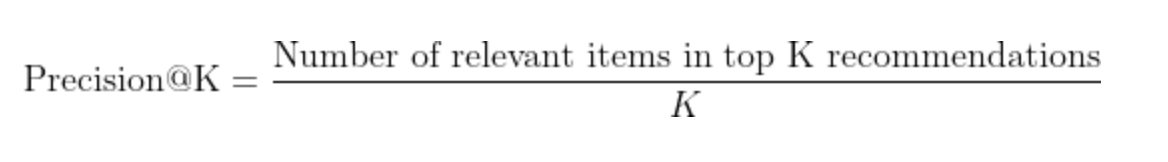

In [ ]:
def precision_at_k(retrieved_items_top_k, relevant_items, k):
    if not retrieved_items_top_k or k == 0:
        return 0.0
    retrieved_at_k = set(retrieved_items_top_k[:k])
    intersection = len(retrieved_at_k.intersection(relevant_items))
    return intersection / k

In [ ]:
all_precision_at_k_text = []
all_recall_text = []
all_precision_at_1_image = [] 


for i, test_case in enumerate(eval_queries):
    query = test_case["query"]
    relevant_article_urls = set(test_case["relevant_articles_urls"])
    relevant_image_urls = set(test_case["relevant_image_urls"])

    k_text = 3
    retrieved_text_docs = retrieve_text(query, text_embeddings_model, text_vectorstore, articles_data, top_k=k_text)
    retrieved_text_urls = [doc['url'] for doc in retrieved_text_docs if 'url' in doc]

    precision_k_text = precision_at_k(retrieved_text_urls, relevant_article_urls, k_text)
    recall_text = recall(set(retrieved_text_urls), relevant_article_urls)

    all_precision_at_k_text.append(precision_k_text)
    all_recall_text.append(recall_text)

    print(f"  Text: Precision@{k_text} = {precision_k_text:.4f}, Recall = {recall_text:.4f}")
    print(f"    Retrieved Text URLs: {retrieved_text_urls}")
    print(f"    Relevant Text URLs (Ground Truth): {list(relevant_article_urls)}")

    retrieved_image_url = retrieve_images(query, clip_model, clip_processor, media_index, media_urls)

    precision_1_image = 0.0
    if retrieved_image_url and retrieved_image_url in relevant_image_urls:
        precision_1_image = 1.0

    all_precision_at_1_image.append(precision_1_image)

    print(f"  Image: Precision@1 = {precision_1_image:.4f}")
    print(f"    Retrieved Image URL: {retrieved_image_url}")
    print(f"    Relevant Image URLs (Ground Truth): {list(relevant_image_urls)}")


NameError: name 'retrieve_text' is not defined